# Pandas and Time Series Data
## Exploring Open Power Systems

[Source of data](https://open-power-system-data.org) for daily consumption, wind, solar, wind+solar.

Credit:
- [https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas)
- [Ian Ozsvald - PyData 2019 talk](https://www.youtube.com/watch?v=8upGdZMlkYM&list=PLGVZCDnMOq0ocea1dd0it7jX7HgvZCjSW&index=13)

Data - [https://github.com/jenfly/opsd/raw/master/opsd_germany_daily.csv](https://github.com/jenfly/opsd/raw/master/opsd_germany_daily.csv)
        

In [1]:
%load_ext watermark

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

import watermark

In [3]:
%matplotlib inline

In [4]:
%watermark -a "Your Name" -u -d -v --iversions

Author: Your Name

Last updated: 2023-06-22

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.12.0

watermark : 2.3.1
seaborn   : 0.12.2
pandas    : 1.5.3
matplotlib: 3.5.3



## Date objects

Datatime objects are timezone aware or unaware. In general you cannot mix and match and it doesn't really make sense to try.

Generally better to have timezones attached to datetimes if you can.

Pandas has some helpful tools for creating and manupulating datetimes.

In [5]:
pd.to_datetime("2018-01-26 15:17")

Timestamp('2018-01-26 15:17:00')

In [6]:
pd.to_datetime("2018-01-26")

Timestamp('2018-01-26 00:00:00')

In [7]:
pd.to_datetime("2021-03-01T14:04:37Z") # ISO 8601 is a good standard to use!

Timestamp('2021-03-01 14:04:37+0000', tz='UTC')

In [8]:
pd.to_datetime("2018-01-26 15:17", utc=True)

Timestamp('2018-01-26 15:17:00+0000', tz='UTC')

In [9]:
# Beware!

pd.to_datetime("8/7/1999")

Timestamp('1999-08-07 00:00:00')

In [10]:
pd.to_datetime("8/7/1999", dayfirst=True)

Timestamp('1999-07-08 00:00:00')

We can also create date ranges using pandas!

In [11]:
pd.date_range("2019-04-01", freq="1d", periods=45)

DatetimeIndex(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08',
               '2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12',
               '2019-04-13', '2019-04-14', '2019-04-15', '2019-04-16',
               '2019-04-17', '2019-04-18', '2019-04-19', '2019-04-20',
               '2019-04-21', '2019-04-22', '2019-04-23', '2019-04-24',
               '2019-04-25', '2019-04-26', '2019-04-27', '2019-04-28',
               '2019-04-29', '2019-04-30', '2019-05-01', '2019-05-02',
               '2019-05-03', '2019-05-04', '2019-05-05', '2019-05-06',
               '2019-05-07', '2019-05-08', '2019-05-09', '2019-05-10',
               '2019-05-11', '2019-05-12', '2019-05-13', '2019-05-14',
               '2019-05-15'],
              dtype='datetime64[ns]', freq='D')

In [12]:
pd.timedelta_range(start="1 day", end="14 day", periods=14)

TimedeltaIndex([ '1 days',  '2 days',  '3 days',  '4 days',  '5 days',
                 '6 days',  '7 days',  '8 days',  '9 days', '10 days',
                '11 days', '12 days', '13 days', '14 days'],
               dtype='timedelta64[ns]', freq=None)

In [13]:
pd.timedelta_range(start="1 day", periods=14, freq="12H")

TimedeltaIndex(['1 days 00:00:00', '1 days 12:00:00', '2 days 00:00:00',
                '2 days 12:00:00', '3 days 00:00:00', '3 days 12:00:00',
                '4 days 00:00:00', '4 days 12:00:00', '5 days 00:00:00',
                '5 days 12:00:00', '6 days 00:00:00', '6 days 12:00:00',
                '7 days 00:00:00', '7 days 12:00:00'],
               dtype='timedelta64[ns]', freq='12H')

# Loading Open Utilities Data

Pandas can read from many sources including CSV, SQL, HDF5 and more ... (read the documentation)

In [14]:
opsd_daily_df = pd.read_csv("https://github.com/jenfly/opsd/raw/master/opsd_germany_daily.csv")

In [15]:
opsd_daily_df.shape

(4383, 5)

In [16]:
opsd_daily_df.head()

Date  Consumption  Wind  Solar  Wind+Solar
0  2006-01-01     1069.184   NaN    NaN         NaN
1  2006-01-02     1380.521   NaN    NaN         NaN
2  2006-01-03     1442.533   NaN    NaN         NaN
3  2006-01-04     1457.217   NaN    NaN         NaN
4  2006-01-05     1477.131   NaN    NaN         NaN

In [17]:
opsd_daily_df.tail()

Date  Consumption     Wind   Solar  Wind+Solar
4378  2017-12-27   1263.94091  394.507  16.530     411.037
4379  2017-12-28   1299.86398  506.424  14.162     520.586
4380  2017-12-29   1295.08753  584.277  29.854     614.131
4381  2017-12-30   1215.44897  721.247   7.467     728.714
4382  2017-12-31   1107.11488  721.176  19.980     741.156

In [18]:
opsd_daily_df.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [19]:
opsd_daily_df.loc[:, "Date"] = opsd_daily_df['Date'].map(pd.to_datetime)

/var/folders/dr/jfbzlbbd5blf2ssyzc3lnf7c0000gn/T/ipykernel_38024/3679670918.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  opsd_daily_df.loc[:, "Date"] = opsd_daily_df['Date'].map(pd.to_datetime)


In [20]:
opsd_daily_df = opsd_daily_df.set_index('Date')

In [21]:
opsd_daily_df.sample(5)

Consumption     Wind    Solar  Wind+Solar
Date                                                 
2011-06-15     1400.402   12.308      NaN         NaN
2017-04-07     1450.322  404.733   97.879     502.612
2013-12-12     1475.418   63.336   20.132      83.468
2015-05-05     1445.995  380.563  107.216     487.779
2015-10-19     1492.327   20.771   37.181      57.952

In [22]:
opsd_daily_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


### Enriching the data with new columns

In [23]:
opsd_daily_df["Year"] = opsd_daily_df.index.year
opsd_daily_df["Month"] = opsd_daily_df.index.month
opsd_daily_df["Weekday Name"] = opsd_daily_df.index.day_name()
opsd_daily_df["Weekday"] = opsd_daily_df.index.weekday

opsd_daily_df["Is Weekend"] = opsd_daily_df["Weekday"].isin((5,6))

In [24]:
opsd_daily_df.head(7)

Consumption  Wind  Solar  Wind+Solar  Year  Month Weekday Name  \
Date                                                                         
2006-01-01     1069.184   NaN    NaN         NaN  2006      1       Sunday   
2006-01-02     1380.521   NaN    NaN         NaN  2006      1       Monday   
2006-01-03     1442.533   NaN    NaN         NaN  2006      1      Tuesday   
2006-01-04     1457.217   NaN    NaN         NaN  2006      1    Wednesday   
2006-01-05     1477.131   NaN    NaN         NaN  2006      1     Thursday   
2006-01-06     1403.427   NaN    NaN         NaN  2006      1       Friday   
2006-01-07     1300.287   NaN    NaN         NaN  2006      1     Saturday   

            Weekday  Is Weekend  
Date                             
2006-01-01        6        True  
2006-01-02        0       False  
2006-01-03        1       False  
2006-01-04        2       False  
2006-01-05        3       False  
2006-01-06        4       False  
2006-01-07        5        True

In [25]:
opsd_daily_df["Weekday Name"].value_counts()

Sunday       627
Monday       626
Tuesday      626
Wednesday    626
Thursday     626
Friday       626
Saturday     626
Name: Weekday Name, dtype: int64

In [26]:
opsd_daily_df.describe()

Consumption         Wind        Solar   Wind+Solar         Year  \
count  4383.000000  2920.000000  2188.000000  2187.000000  4383.000000   
mean   1338.675836   164.814173    89.258695   272.663481  2011.500342   
std     165.775710   143.692732    58.550099   146.319884     3.452347   
min     842.395000     5.757000     1.968000    21.478000  2006.000000   
25%    1217.859000    62.353250    35.179250   172.185500  2008.500000   
50%    1367.123000   119.098000    86.407000   240.991000  2012.000000   
75%    1457.761000   217.900250   135.071500   338.988000  2014.500000   
max    1709.568000   826.278000   241.580000   851.556000  2017.000000   

             Month      Weekday  
count  4383.000000  4383.000000  
mean      6.522930     3.000684  
std       3.449097     2.000513  
min       1.000000     0.000000  
25%       4.000000     1.000000  
50%       7.000000     3.000000  
75%      10.000000     5.000000  
max      12.000000     6.000000

In [27]:
from pandas_profiling import ProfileReport

/var/folders/dr/jfbzlbbd5blf2ssyzc3lnf7c0000gn/T/ipykernel_38024/2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [28]:
profile = ProfileReport(opsd_daily_df, title="Pandas Profiling Report")

In [29]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Visualisation

In [30]:
import seaborn as sns

In [31]:
# Use default style for Seaborn and set plot size

sns.set(rc={'figure.figsize': (16, 8)})

<AxesSubplot:xlabel='Date'>

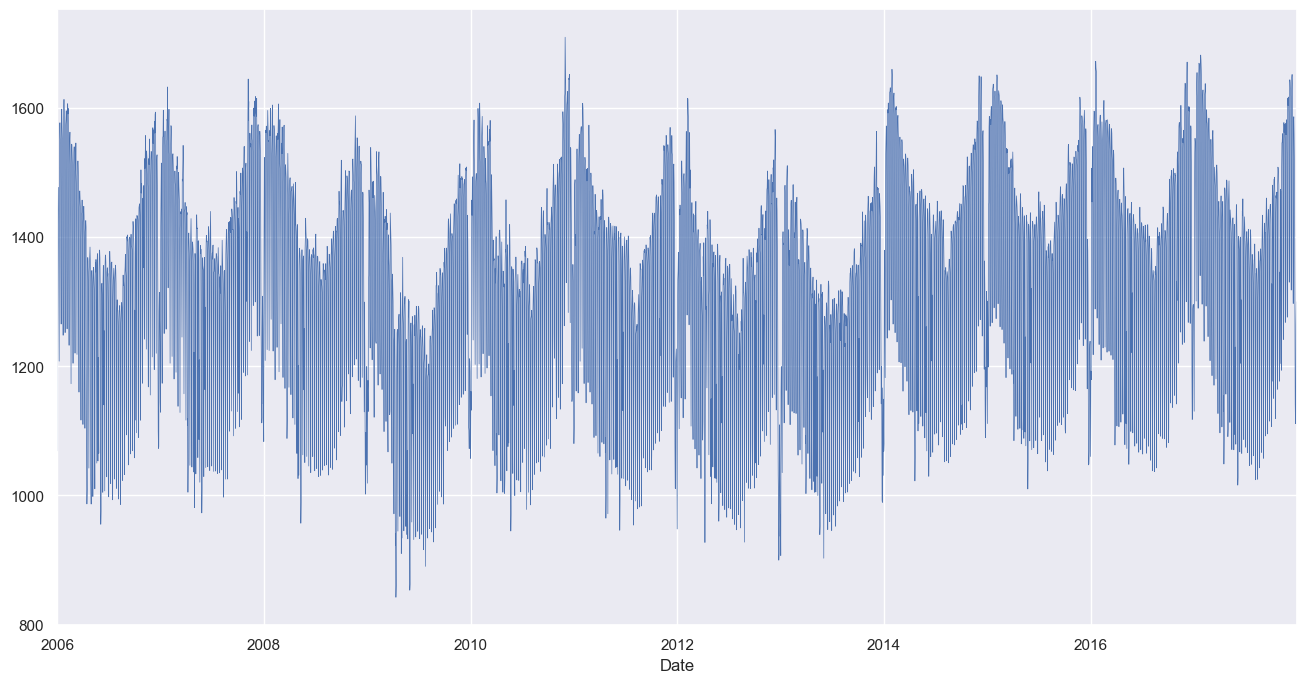

In [32]:
opsd_daily_df['Consumption'].plot(linewidth=0.5)

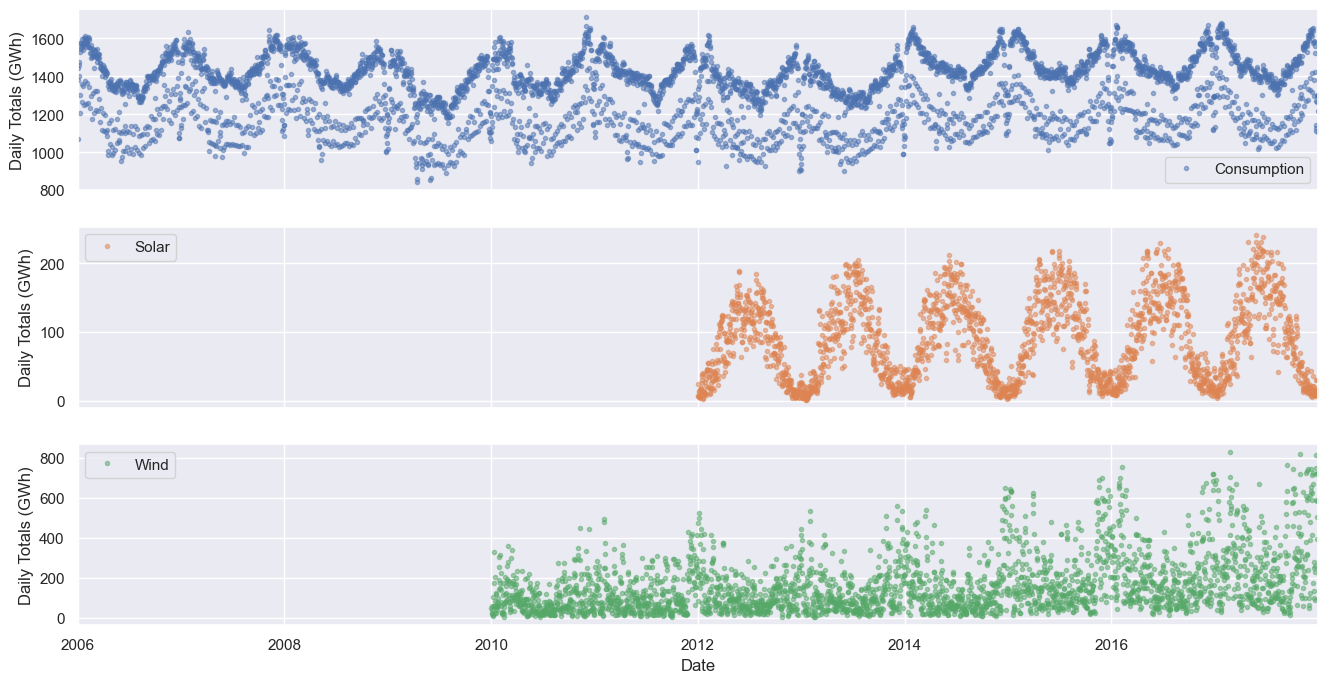

In [33]:
cols_plot = ["Consumption", "Solar", "Wind"]
axes = opsd_daily_df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', subplots=True)
for ax in axes:
    ax.set_ylabel("Daily Totals (GWh)")

#### What behaviours can you see in the data?

What patterns are identifiable by eye?

### Exploring the patterns

Text(0.5, 1.0, "2017's Consumption by Day")

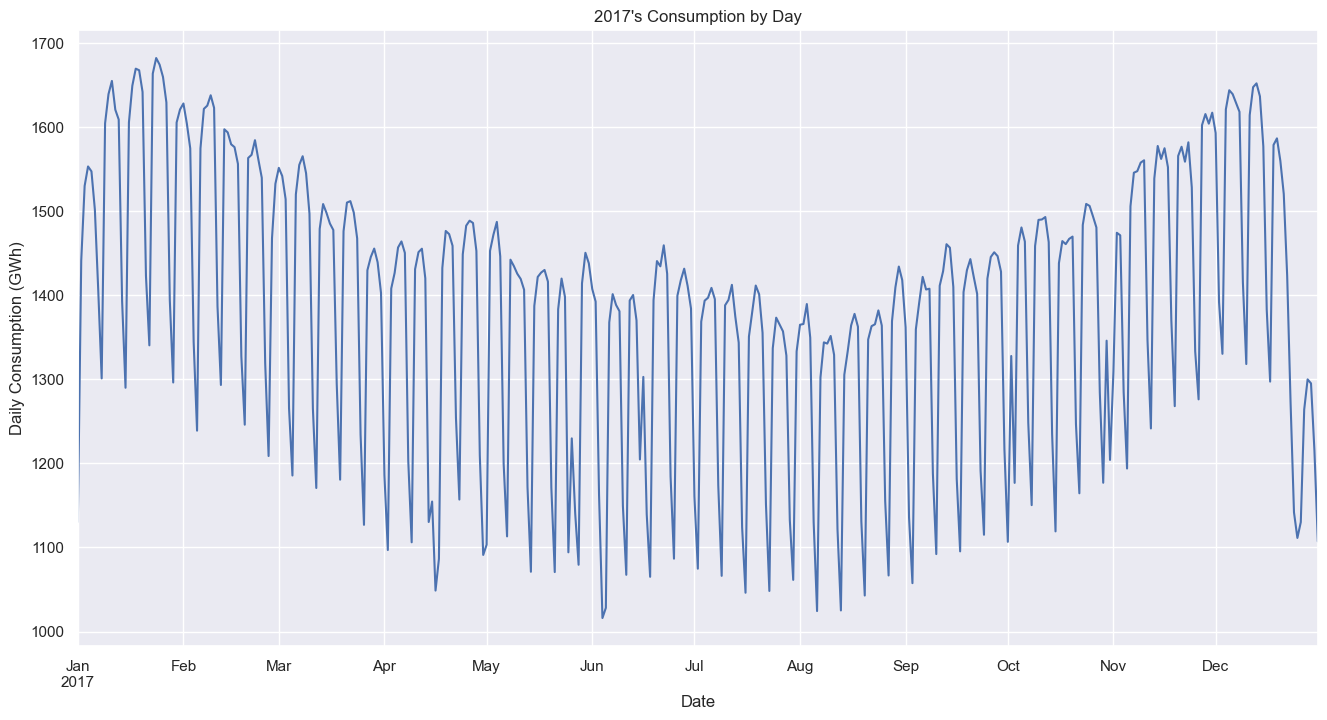

In [34]:
ax = opsd_daily_df.loc["2017", "Consumption"].plot()
ax.set_ylabel("Daily Consumption (GWh)")
ax.set_title("2017's Consumption by Day")

### Exercise: Can you group the data to get monthly means for consumption?

- Take a subset of the data for 2017
- Use the ```groupby``` function to aggregate the data by month
- You can calculate the mean, but you can also use other aggrgate functions e.g. max, min, sum, median, std. Experiment and see what you find
- Don't forget to plot the results!

In [35]:
consumption_2017_df = opsd_daily_df.loc['2017', ["Consumption", "Month"]].copy()
consumption_2017_df.head()

Consumption  Month
Date                          
2017-01-01     1130.413      1
2017-01-02     1441.052      1
2017-01-03     1529.990      1
2017-01-04     1553.083      1
2017-01-05     1547.238      1

In [36]:
monthly_consumption_2017_df = consumption_2017_df.groupby("Month").mean()

(1.0, 12.0)

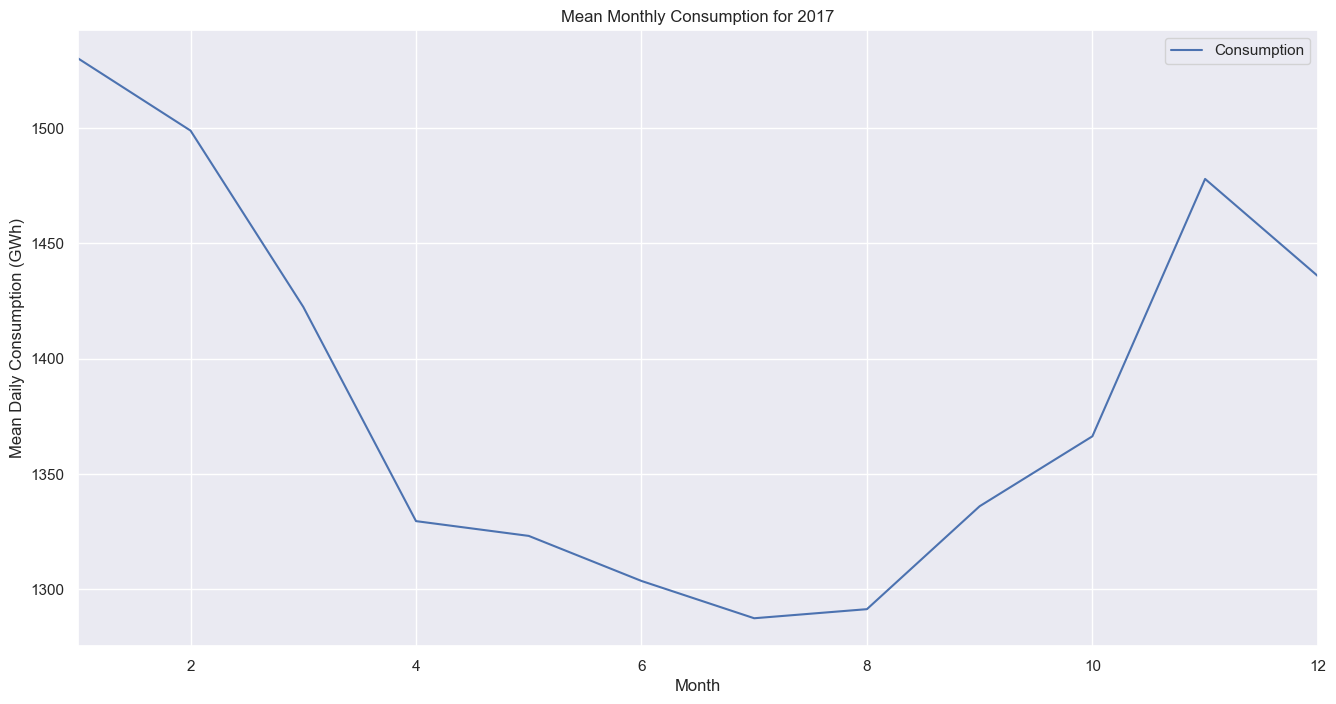

In [37]:
ax = monthly_consumption_2017_df.plot()
ax.set_ylabel("Mean Daily Consumption (GWh)")
ax.set_title("Mean Monthly Consumption for 2017")
ax.set_xlim(1,12)

### Diving in deeper

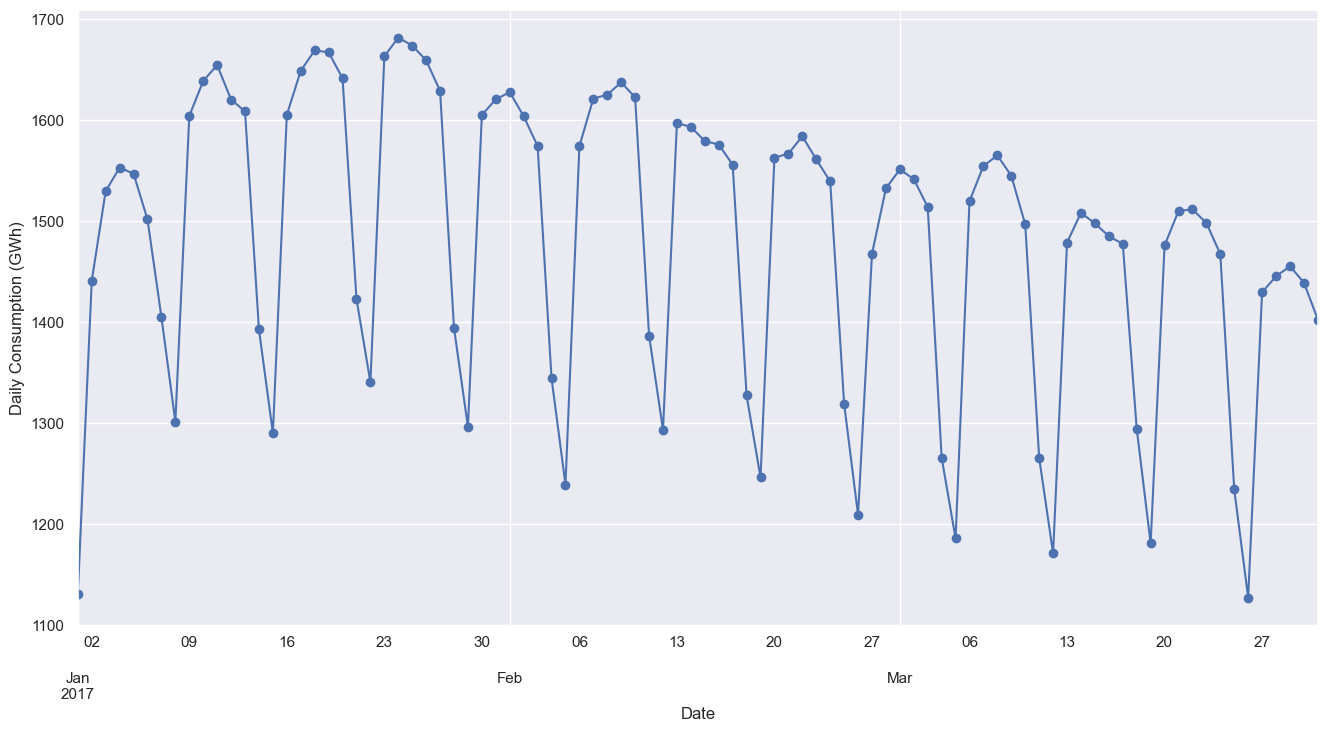

In [38]:
ax = opsd_daily_df.loc["2017-01":"2017-03", "Consumption"].plot(marker='o', linestyle='-')
ax.set_ylabel("Daily Consumption (GWh)");

In [39]:
import matplotlib.dates as mdates

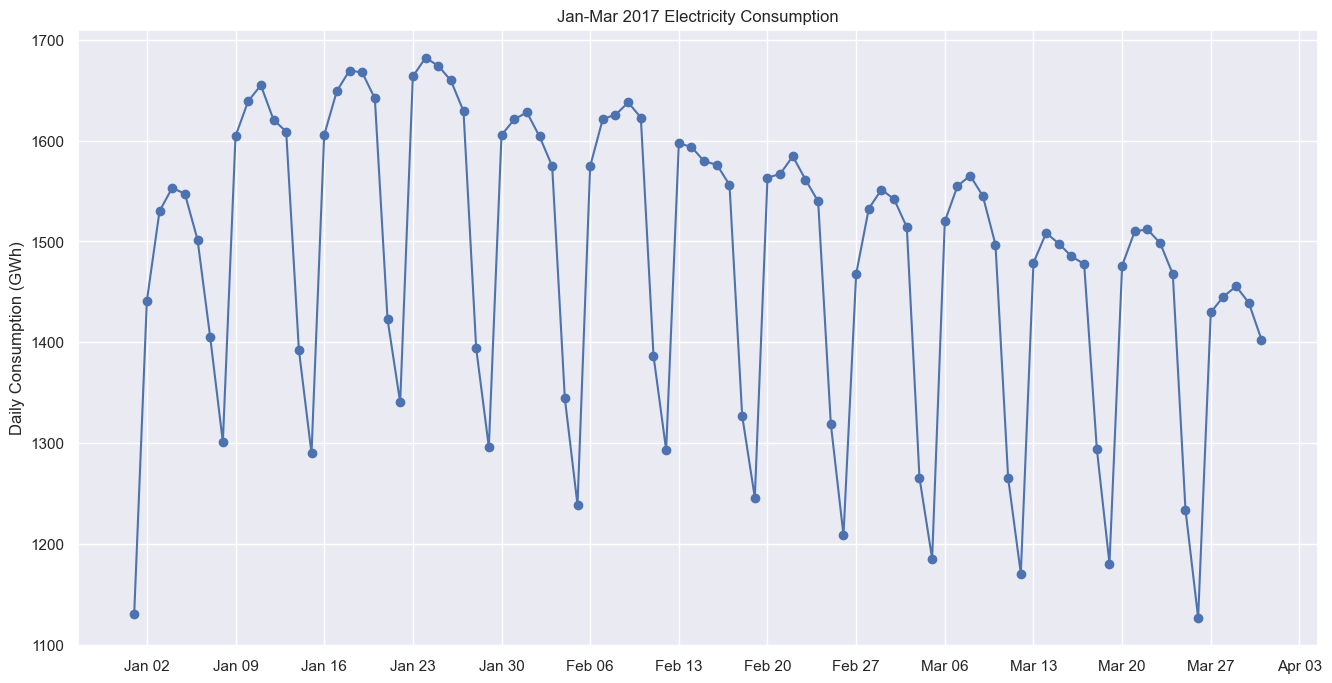

In [40]:
fig, ax = plt.subplots()
ax.plot(opsd_daily_df.loc["2017-01": "2017-03", "Consumption"], marker='o', linestyle='-')
ax.set_ylabel("Daily Consumption (GWh)")
ax.set_title("Jan-Mar 2017 Electricity Consumption")

# Change the markers to weekly intervals
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

# Format the x-tick labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

### Grouping on the weekday to see the mean behaviour by day of week

In [41]:
mean_by_weekday_df = opsd_daily_df.loc["2017", ["Consumption", "Weekday"]].groupby("Weekday").mean()
mean_by_weekday_df

Consumption
Weekday             
0        1427.530056
1        1466.728105
2        1482.121188
3        1471.985919
4        1446.916857
5        1242.253721
6        1146.877459

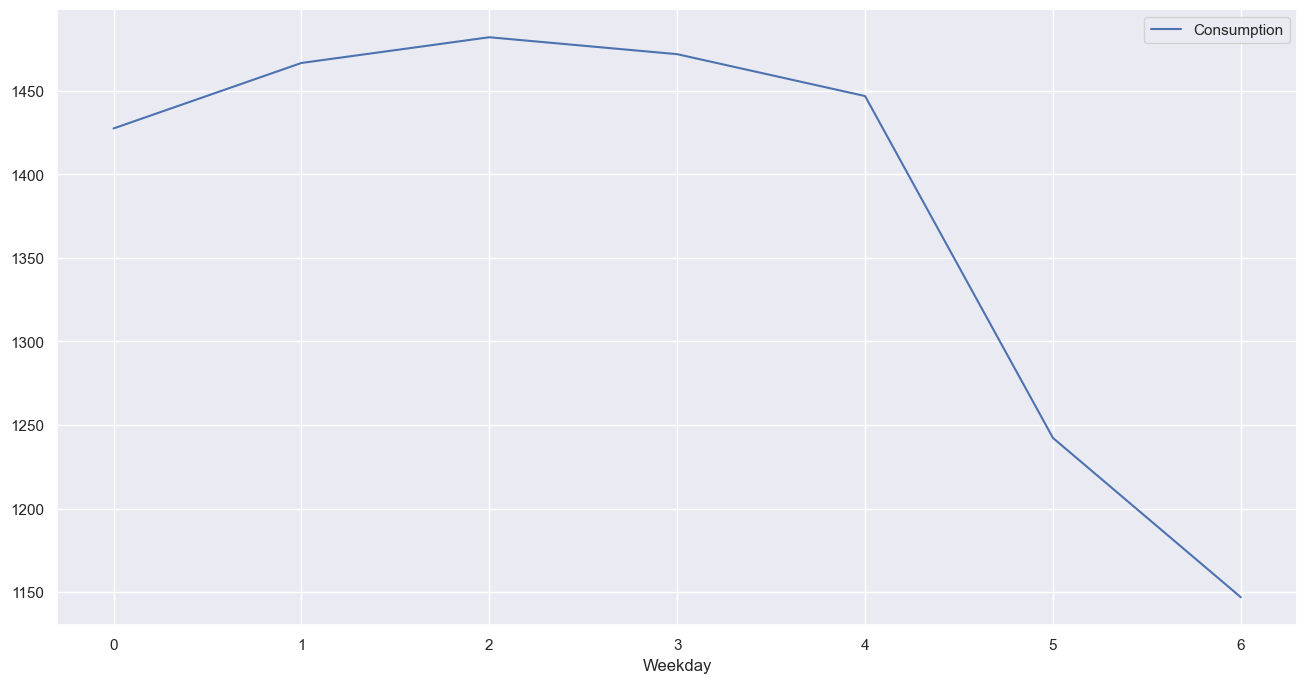

In [42]:
mean_by_weekday_df.plot();

In [43]:
day_of_week = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
new_index = mean_by_weekday_df.index.map(day_of_week)
mean_by_weekday_df.set_index(new_index)

Consumption
Weekday               
Monday     1427.530056
Tuesday    1466.728105
Wednesday  1482.121188
Thursday   1471.985919
Friday     1446.916857
Saturday   1242.253721
Sunday     1146.877459

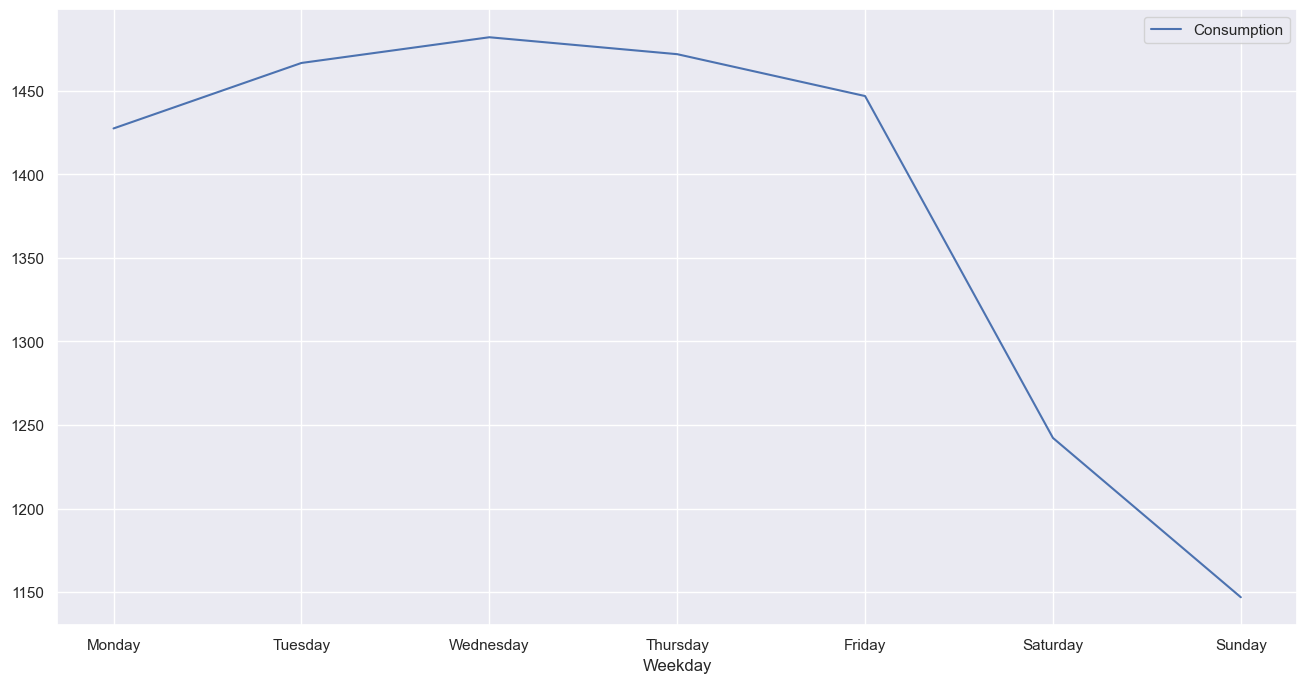

In [44]:
mean_by_weekday_df.set_index(new_index).plot();

## Summarising the seasonality using Seaborn

Looking for patterns, behaviours and outliers

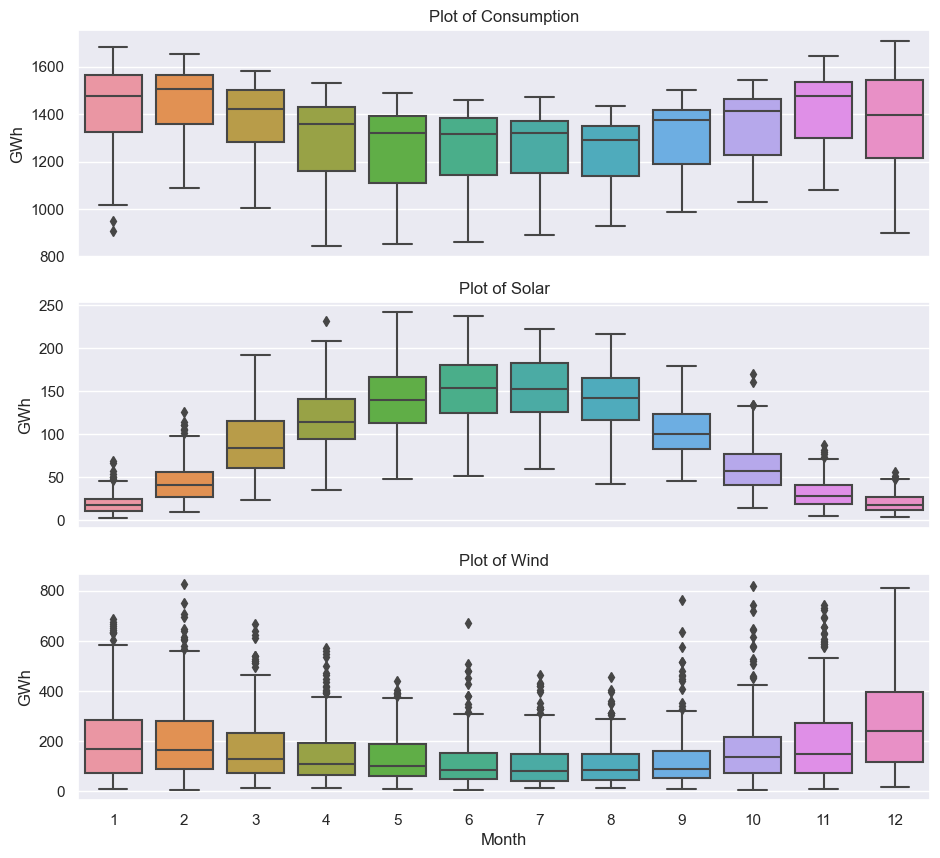

In [45]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(["Consumption", "Solar", "Wind"], axes):
    sns.boxplot(data=opsd_daily_df, x="Month", y=name, ax=ax)
    ax.set_ylabel("GWh")
    ax.set_title(f"Plot of {name}")
    
    # Clean up the automatic x-axis label from all but the last plot
    if ax != axes[-1]:
        ax.set_xlabel("")

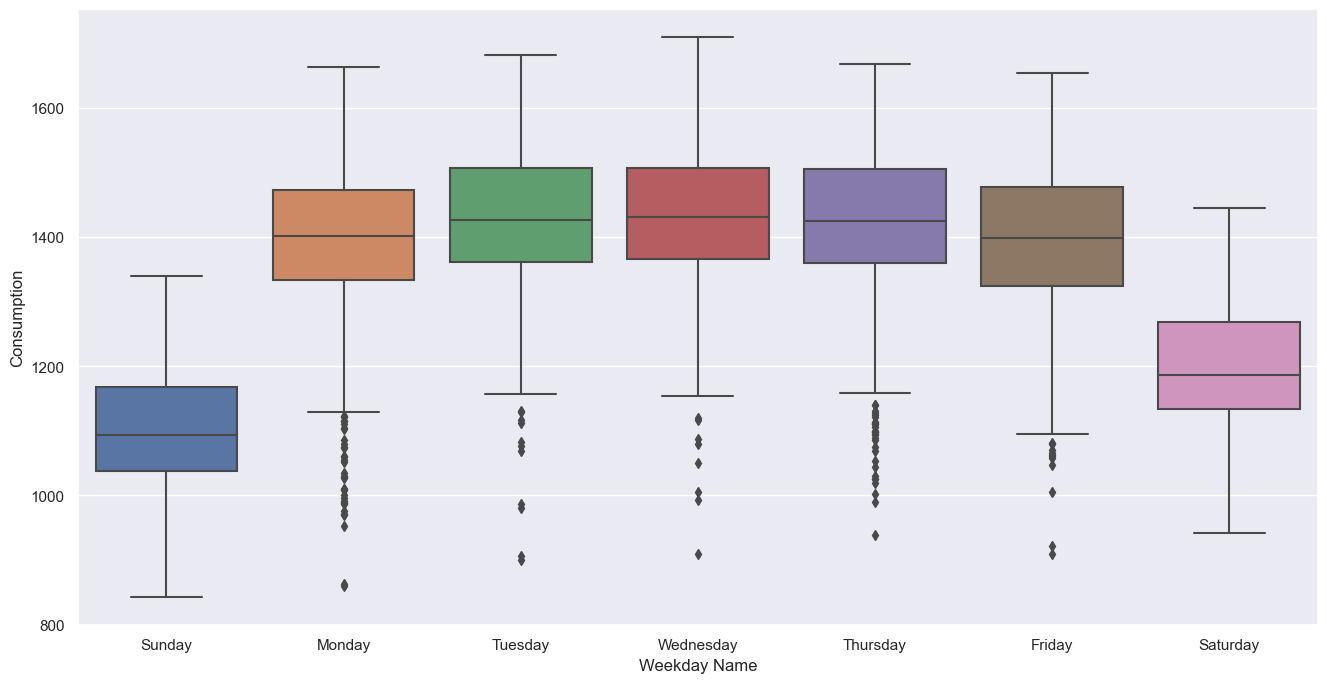

In [46]:
sns.boxplot(data=opsd_daily_df, x="Weekday Name", y="Consumption");

#### What if we want the data in a different order?

In [47]:
day_of_week

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

In [48]:
day_of_week.values()

dict_values(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

<AxesSubplot:xlabel='Weekday Name', ylabel='Consumption'>

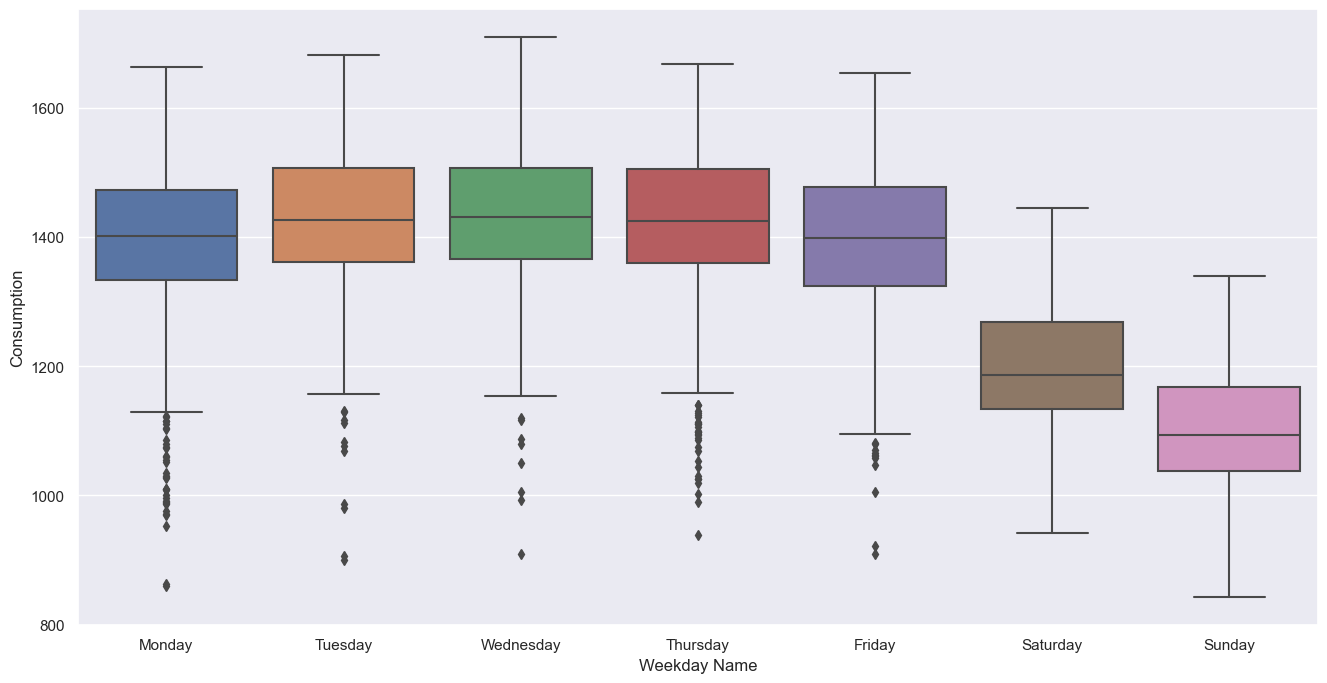

In [49]:
sns.boxplot(data=opsd_daily_df, x="Weekday Name", y="Consumption", order=day_of_week.values())

#### Where do the outliers come from? Are there any holidays in the data? 

In [50]:
daily_mask = opsd_daily_df['Weekday Name'] == "Monday"
opsd_daily_df[daily_mask].query("Consumption < 1000").sort_values("Month")

Consumption     Wind    Solar  Wind+Solar  Year  Month  \
Date                                                                 
2009-04-13      860.508      NaN      NaN         NaN  2009      4   
2006-05-01      986.698      NaN      NaN         NaN  2006      5   
2008-05-12      989.434      NaN      NaN         NaN  2008      5   
2010-05-24      972.080  128.338      NaN         NaN  2010      5   
2012-05-28      988.853   36.311  151.315     187.626  2012      5   
2013-05-20      952.727   80.383  110.032     190.415  2013      5   
2006-06-05      975.632      NaN      NaN         NaN  2006      6   
2009-06-01      862.577      NaN      NaN         NaN  2009      6   
2011-06-13      995.460   62.986      NaN         NaN  2011      6   
2012-12-24      990.706  239.102   26.680     265.782  2012     12   
2012-12-31      969.810  446.492   25.097     471.589  2012     12   

           Weekday Name  Weekday  Is Weekend  
Date                                          
2009-04-13       Monday        0       False  
2006-05-01       Monday        0       False  
2008-05-12       Monday        0       False  
2010-05-24       Monday        0       False  
2012-05-28       Monday        0       False  
2013-05-20       Monday        0       False  
2006-06-05       Monday        0       False  
2009-06-01       Monday        0       False  
2011-06-13       Monday        0       False  
2012-12-24       Monday        0       False  
2012-12-31       Monday        0       False

## Autocorrelation and lags

How simialr is today's point to the same point N days in the future? Autocorreclation tests all frequencies.

Lags look at 1 frequency (default is 1 unit ahead)

In [51]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

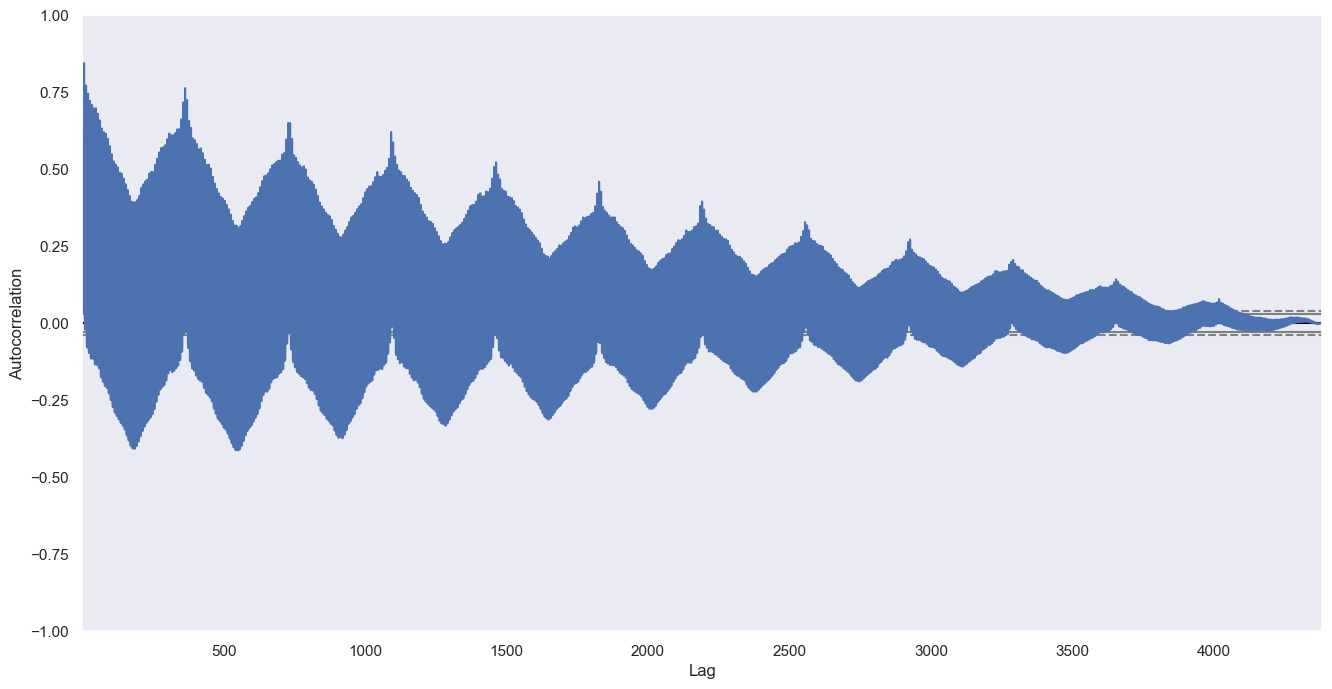

In [52]:
autocorrelation_plot(opsd_daily_df["Consumption"])

(0.0, 30.0)

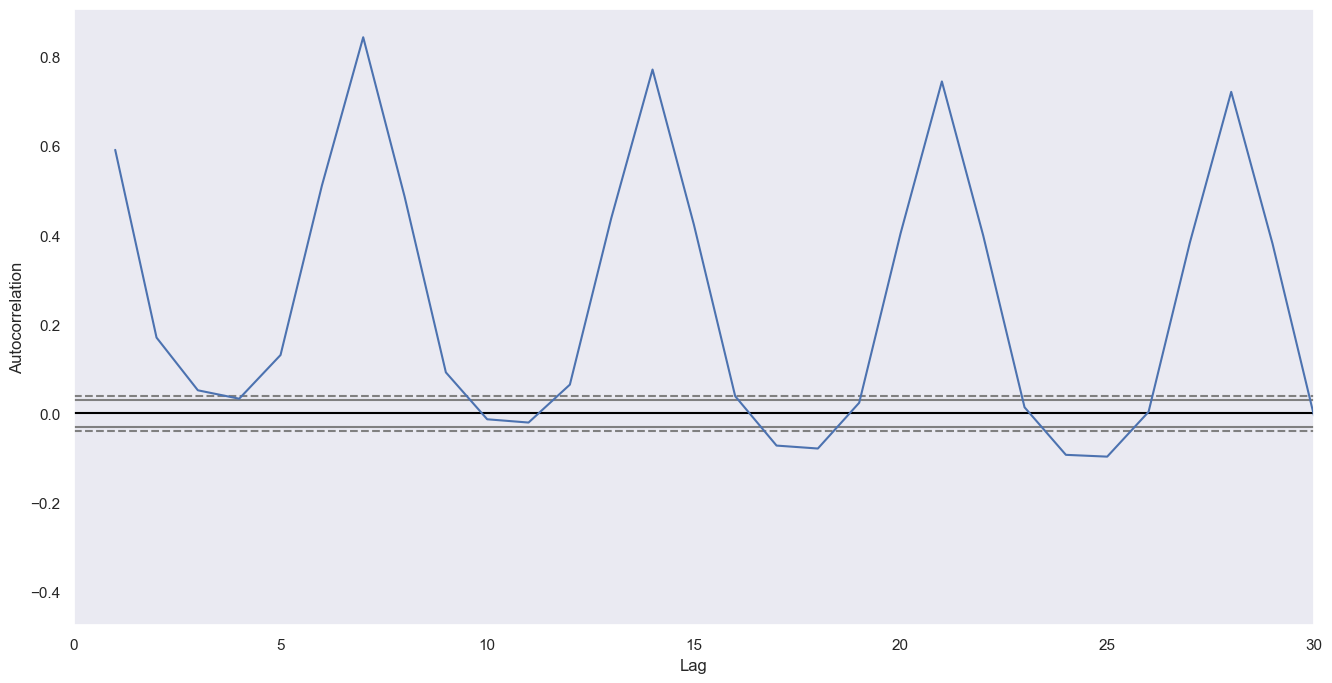

In [53]:
fig, ax = plt.subplots();
autocorrelation_plot(opsd_daily_df["Consumption"], ax=ax)
ax.set_xlim(0, 30)

(0.0, 360.0)

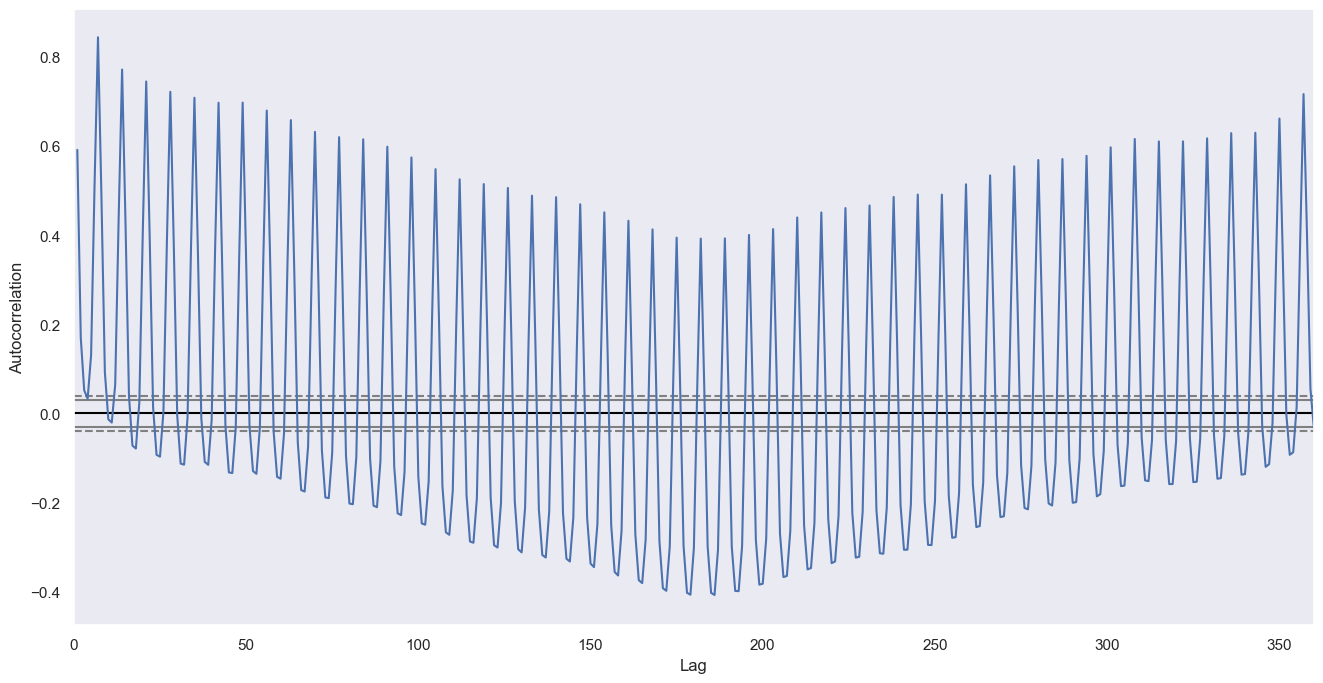

In [54]:
fig, ax = plt.subplots();
autocorrelation_plot(opsd_daily_df["Consumption"], ax=ax)
ax.set_xlim(0, 360)

Lag plot shows structure between $y(t)$ and $y(t+1)$. A visual relationship suggests there is structure in the data.

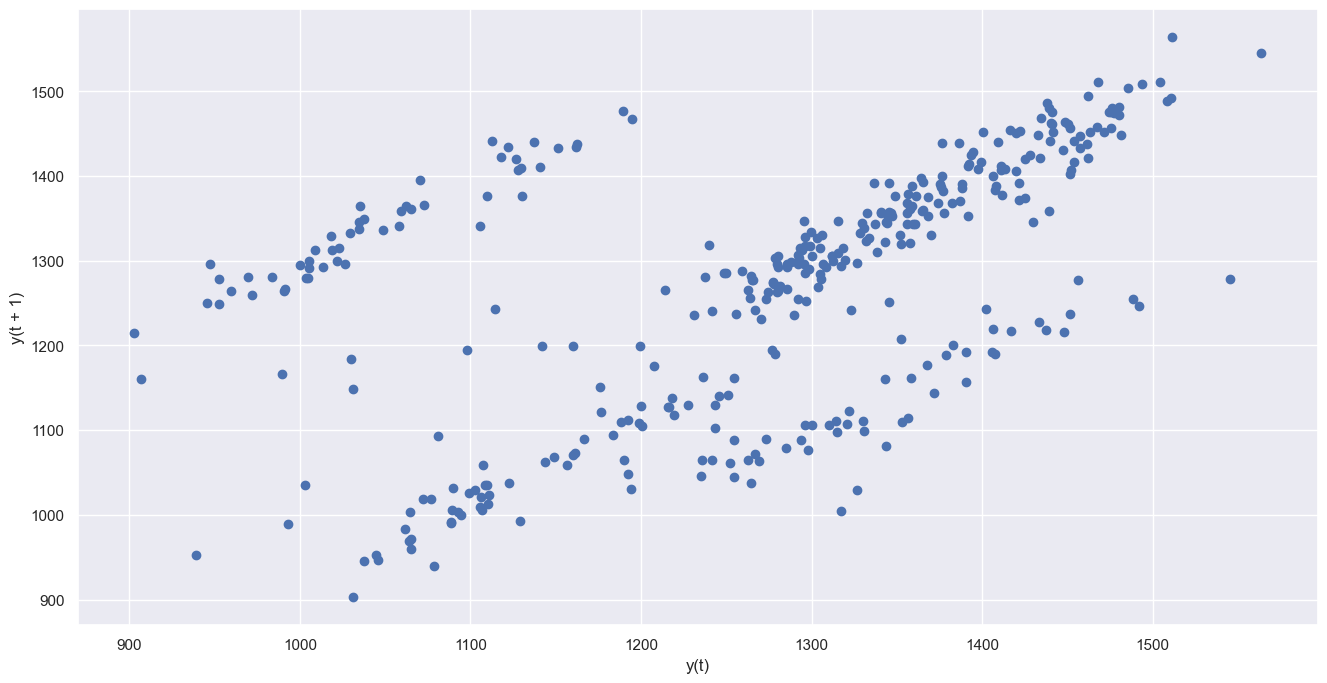

In [55]:
from pandas.plotting import lag_plot

data = opsd_daily_df.loc["2013"]
lag_plot(data["Consumption"]);

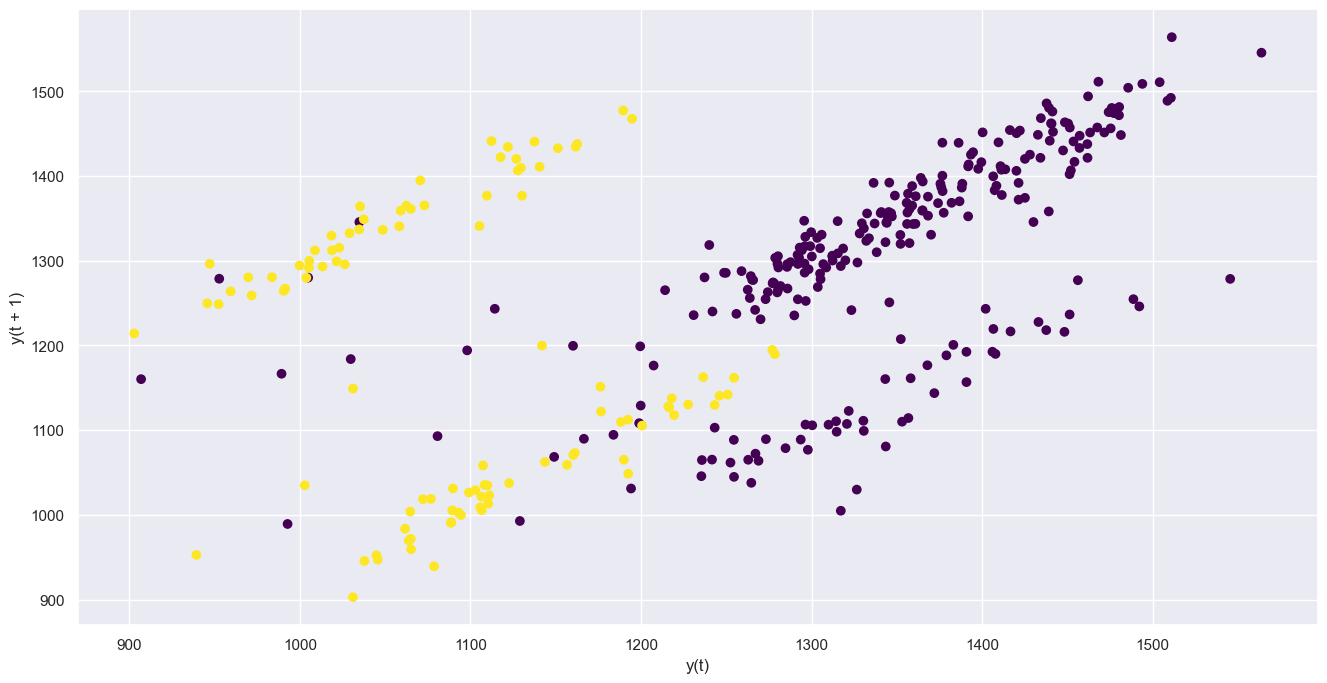

In [56]:
lag_plot(data["Consumption"], c=data["Is Weekend"][:-1], cmap='viridis');

#### Exercise: Can you show the lag plot by day of week?

The Viridis colourmap goes from purple to green to yellow - do we see any daily structure?

In [57]:
# your code here
opsd_daily_df[["Weekday", "Weekday Name"]].drop_duplicates().sort_values("Weekday")

Weekday Weekday Name
Date                            
2006-01-02        0       Monday
2006-01-03        1      Tuesday
2006-01-04        2    Wednesday
2006-01-05        3     Thursday
2006-01-06        4       Friday
2006-01-07        5     Saturday
2006-01-01        6       Sunday

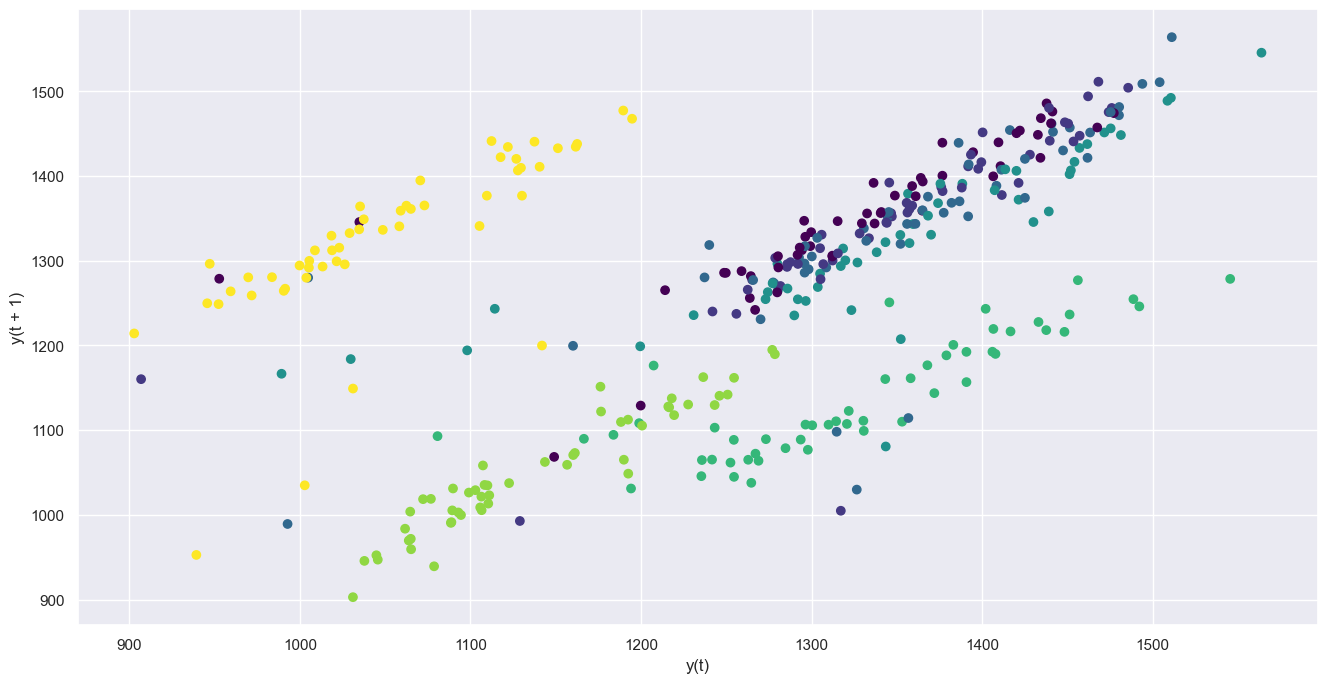

In [58]:
lag_plot(data["Consumption"], c=data["Weekday"][:-1], cmap='viridis');

## Data ranges and resampling

In [59]:
pd.date_range("2020-02-04", periods=12, freq="H")

DatetimeIndex(['2020-02-04 00:00:00', '2020-02-04 01:00:00',
               '2020-02-04 02:00:00', '2020-02-04 03:00:00',
               '2020-02-04 04:00:00', '2020-02-04 05:00:00',
               '2020-02-04 06:00:00', '2020-02-04 07:00:00',
               '2020-02-04 08:00:00', '2020-02-04 09:00:00',
               '2020-02-04 10:00:00', '2020-02-04 11:00:00'],
              dtype='datetime64[ns]', freq='H')

In [60]:
opsd_daily_df.index[:5]

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

Let's make a small copy

In [61]:
times_sample = pd.to_datetime(["2013-02-03", "2013-02-06", "2013-02-08"])

consum_sample_df = opsd_daily_df.loc[times_sample, ["Consumption"]].copy()
consum_sample_df

Consumption
2013-02-03     1109.639
2013-02-06     1451.449
2013-02-08     1433.098

In [62]:
# Convert the data to daily frequency, without filling in any missing data
consum_freq_df = consum_sample_df.asfreq('D')
consum_freq_df

Consumption
2013-02-03     1109.639
2013-02-04          NaN
2013-02-05          NaN
2013-02-06     1451.449
2013-02-07          NaN
2013-02-08     1433.098

### How do we fill in the missing data?

In [63]:
consum_freq_df["Consumption - Forward Fill"] = consum_sample_df.asfreq("D", method="ffill")
consum_freq_df["Consumption - Backward Fill"] = consum_sample_df.asfreq("D", method="bfill")
consum_freq_df

Consumption  Consumption - Forward Fill  \
2013-02-03     1109.639                    1109.639   
2013-02-04          NaN                    1109.639   
2013-02-05          NaN                    1109.639   
2013-02-06     1451.449                    1451.449   
2013-02-07          NaN                    1451.449   
2013-02-08     1433.098                    1433.098   

            Consumption - Backward Fill  
2013-02-03                     1109.639  
2013-02-04                     1451.449  
2013-02-05                     1451.449  
2013-02-06                     1451.449  
2013-02-07                     1433.098  
2013-02-08                     1433.098

### Weekly resampling - downsampling our data

In [64]:
# Specify the columns we want to include
data_columns = ["Consumption", "Wind", "Solar", "Wind+Solar"]

# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean_df = opsd_daily_df[data_columns].resample('W').mean()
opsd_weekly_mean_df.tail(10)

Consumption        Wind      Solar  Wind+Solar
Date                                                      
2017-10-29  1419.077067  485.735571  44.344857  530.080429
2017-11-05  1326.164499  300.840286  49.796857  350.637143
2017-11-12  1472.113604  273.502143  21.129000  294.631143
2017-11-19  1491.885550  329.920000  28.595143  358.515143
2017-11-26  1488.566089  452.703286  25.847857  478.551143
2017-12-03  1536.236314  284.334286  18.320857  302.655143
2017-12-10  1554.824946  636.514714  16.440286  652.955000
2017-12-17  1543.856889  442.531857  18.143714  460.675571
2017-12-24  1440.342401  339.018429   9.895143  348.913571
2017-12-31  1203.265211  604.699143  19.240143  623.939286

What's going on? What do we expect to see?

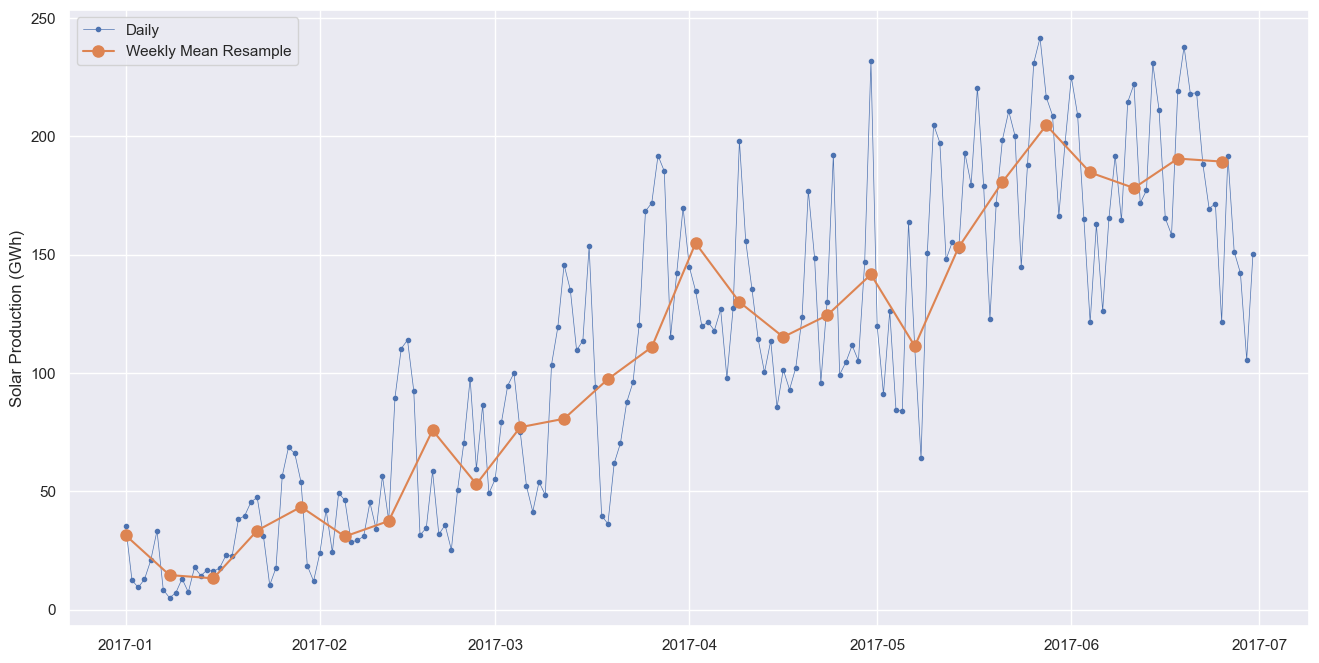

In [65]:
start, end = "2017-01", "2017-06"

# Plot daily and weekly resample time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily_df.loc[start:end, "Solar"],
        marker='.', 
        linestyle="-", linewidth=0.5, 
        label="Daily"
       )

ax.plot(opsd_weekly_mean_df.loc[start:end, "Solar"],
        marker="o", markersize=8,
        linestyle="-",
        label="Weekly Mean Resample"
       )

ax.set_ylabel("Solar Production (GWh)")
ax.legend()

### Rolling means

In [66]:
# Calculate the centred 7-day rolling mean (not centred, using history only)

opsd_7d_df = opsd_daily_df[data_columns].rolling(7, center=False).mean()
opsd_7d_df.head(10)

Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01          NaN   NaN    NaN         NaN
2006-01-02          NaN   NaN    NaN         NaN
2006-01-03          NaN   NaN    NaN         NaN
2006-01-04          NaN   NaN    NaN         NaN
2006-01-05          NaN   NaN    NaN         NaN
2006-01-06          NaN   NaN    NaN         NaN
2006-01-07  1361.471429   NaN    NaN         NaN
2006-01-08  1381.300143   NaN    NaN         NaN
2006-01-09  1402.557571   NaN    NaN         NaN
2006-01-10  1421.754429   NaN    NaN         NaN

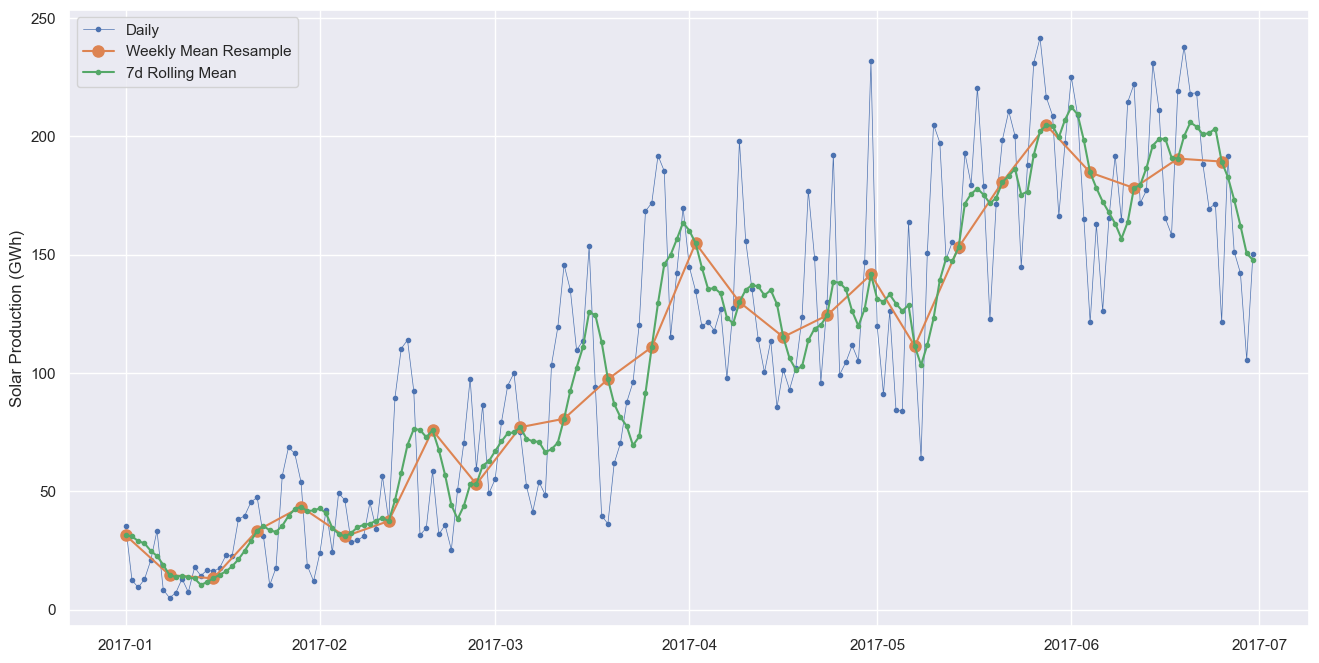

In [67]:
start, end = "2017-01", "2017-06"

# Plot daily and weekly resample time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily_df.loc[start:end, "Solar"],
        marker='.', 
        linestyle="-", linewidth=0.5, 
        label="Daily"
       )

ax.plot(opsd_weekly_mean_df.loc[start:end, "Solar"],
        marker="o", markersize=8,
        linestyle="-",
        label="Weekly Mean Resample"
       )

ax.plot(opsd_7d_df.loc[start:end, "Solar"],
        marker=".",
        linestyle="-",
        label="7d Rolling Mean"
       )

ax.set_ylabel("Solar Production (GWh)")
ax.legend()

### Trends

If we plot 365 trend vs a 7 day trend what can we see for overall consumption and green energy production

In [68]:
opsd_365d_df = opsd_daily_df[data_columns].rolling(window=365, center=False, min_periods=360).mean()

Text(0.5, 1.0, 'Treads in Electricity Consumption')

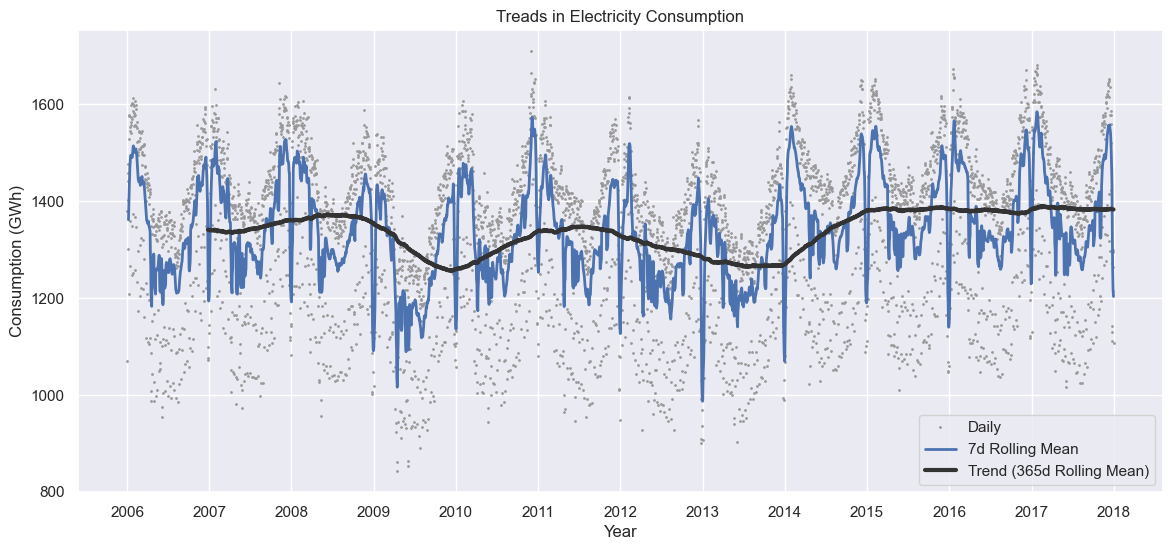

In [69]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(opsd_daily_df.loc[:, "Consumption"],
        marker='.', markersize=2,
        linestyle="None", color="0.6",
        label="Daily"
       )

ax.plot(opsd_7d_df.loc[:, "Consumption"],
        linewidth=2,
        label="7d Rolling Mean"
       )

ax.plot(opsd_365d_df.loc[:, "Consumption"],
        linewidth=3, color="0.2",
        label="Trend (365d Rolling Mean)"
       )

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Consumption (GWh)")
ax.set_title("Treads in Electricity Consumption")

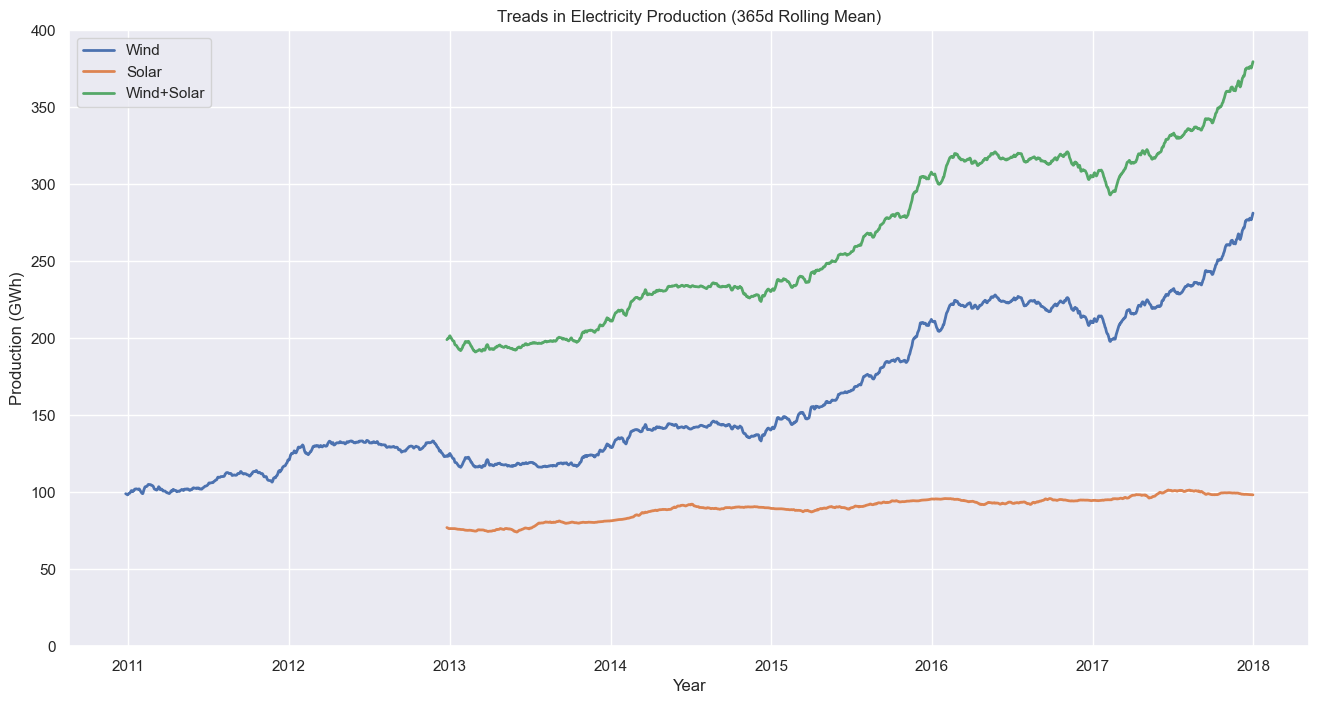

In [70]:
fig, ax = plt.subplots()

for power_source in ["Wind", "Solar", "Wind+Solar"]:
    ax.plot(opsd_365d_df.loc[:, power_source],
            linewidth=2,
            label=f"{power_source}"
           )
    
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_ylim(0, 400)    
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Production (GWh)")
ax.set_title("Treads in Electricity Production (365d Rolling Mean)");

## What is the share of green power over the years?

In [71]:
# Compute the annual sums, setting the value to NaN for any year
# with less than 360 days of data

opsd_annual_df = opsd_daily_df[data_columns].resample("A").sum(min_count=360)

# The default index of the resampled data is the last day of each year
# Reset the index to only be the year component
opsd_annual_df = opsd_annual_df.set_index(opsd_annual_df.index.year)
opsd_annual_df.index.name = "Year"
opsd_annual_df

Consumption        Wind      Solar  Wind+Solar
Year                                                 
2006  489068.53600         NaN        NaN         NaN
2007  496631.84700         NaN        NaN         NaN
2008  495570.87600         NaN        NaN         NaN
2009  459737.42800         NaN        NaN         NaN
2010  488588.70000   35911.777        NaN         NaN
2011  484814.08600   44032.951        NaN         NaN
2012  469574.75400   45862.667  27887.332   73749.999
2013  463336.85300   47197.832  29559.780   76697.443
2014  504164.82100   51107.672  32498.307   83370.502
2015  505264.56300   77468.994  34907.138  112376.132
2016  505927.35400   77008.126  34562.824  111570.950
2017  504736.36939  102667.365  35882.643  138550.008

### Exercise: Compute the fraction of wind+solar to overall consumption and plot it

Make sure to label your plot appropriately

In [72]:
# Code here
opsd_annual_df["Green Fraction"] = opsd_annual_df.apply(lambda x: 100*x["Wind+Solar"]/x["Consumption"], axis=1)
opsd_annual_df

Consumption        Wind      Solar  Wind+Solar  Green Fraction
Year                                                                 
2006  489068.53600         NaN        NaN         NaN             NaN
2007  496631.84700         NaN        NaN         NaN             NaN
2008  495570.87600         NaN        NaN         NaN             NaN
2009  459737.42800         NaN        NaN         NaN             NaN
2010  488588.70000   35911.777        NaN         NaN             NaN
2011  484814.08600   44032.951        NaN         NaN             NaN
2012  469574.75400   45862.667  27887.332   73749.999       15.705699
2013  463336.85300   47197.832  29559.780   76697.443       16.553279
2014  504164.82100   51107.672  32498.307   83370.502       16.536358
2015  505264.56300   77468.994  34907.138  112376.132       22.241048
2016  505927.35400   77008.126  34562.824  111570.950       22.052761
2017  504736.36939  102667.365  35882.643  138550.008       27.449975

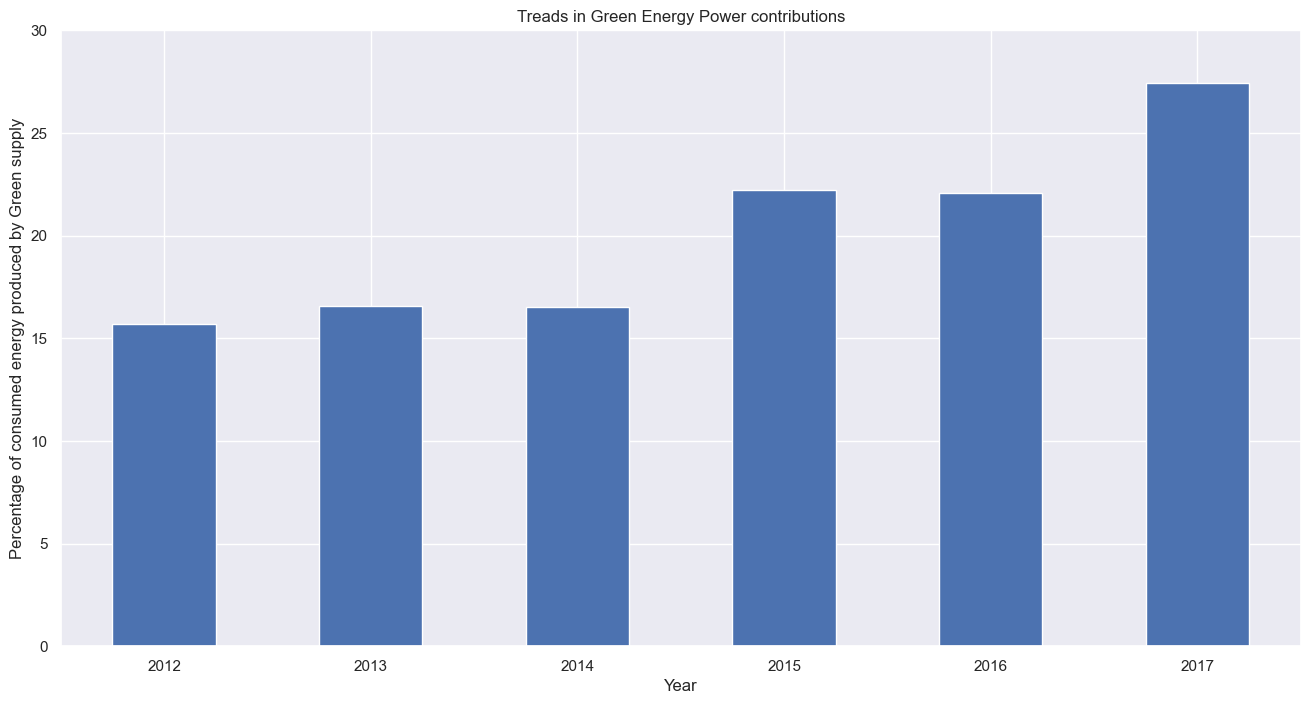

In [74]:
fig, ax = plt.subplots()

opsd_annual_df.loc[2012:, "Green Fraction"].plot(kind="bar", ax=ax)
    
ax.set_ylim(0, 30)
plt.xticks(rotation=0)
#ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of consumed energy produced by Green supply")
ax.set_title("Treads in Green Energy Power contributions");

# Extension

Check out the Prophet time series modelling library from Facebook [here](https://facebook.github.io/prophet/)